In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'Train', shuffle=True
)
test_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'Test', shuffle=False
)

Found 5000 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(train_gen, epochs=5, validation_data=test_gen)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 92s 582ms/step - accuracy: 0.2805 - loss: 1.8653 - val_accuracy: 0.5200 - val_loss: 1.0761
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 606ms/step - accuracy: 0.5751 - loss: 1.0987 - val_accuracy: 0.7000 - val_loss: 0.7507
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 101s 642ms/step - accuracy: 0.7129 - loss: 0.7536 - val_accuracy: 0.9400 - val_loss: 0.3703
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 101s 645ms/step - accuracy: 0.8824 - loss: 0.3760 - val_accuracy: 1.0000 - val_loss: 0.1023
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 673ms/step - accuracy: 0.9516 - loss: 0.1658 - val_accuracy: 1.0000 - val_loss: 0.0320


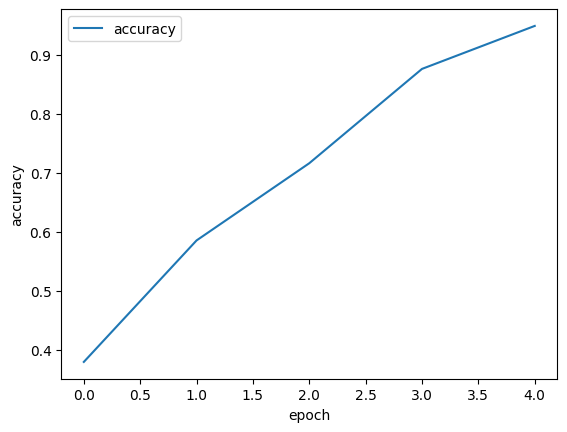

In [5]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


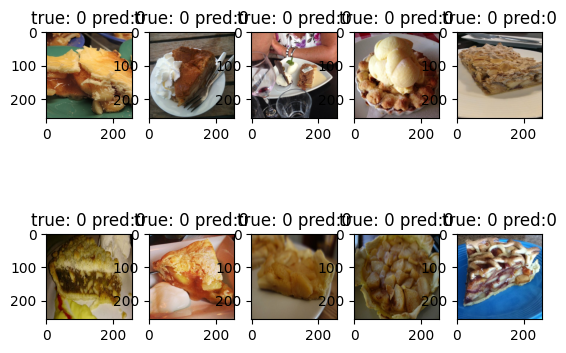

In [10]:
import numpy as np

x, y = next(test_gen)
predictions = model.predict(test_gen)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i])
    plt.title(f"true: {np.argmax(y[i])} pred:{np.argmax(predictions[i])}")

In [12]:
y_true = test_gen.classes
y_pred = np.argmax(predictions, axis=1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

